## Kaggle 타이타닉 생존자 예측1 - EDA

### 1. 데이터 기본정보  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mydir = r'D:\Python\kaggle\titanic\\'
df = pd.read_csv(mydir + "train.csv", dtype=str)

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NaN,S


변수 설명

| Colname | 설명 | Type |
|:---:|:---:|:---:|
| PassengerId | 승객 번호 | 문자형 |
| Survived | 생존여부(1: 생존, 0 : 사망) | 범주형(이진) |
| Pclass | 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd) | 범주형 |
| Name | 승객 이름 | 문자형 |
| Sex | 승객 성별 | 범주형(이진, 남자 or 여자) |
| Age | 승객 나이 | 연속형 |
| SibSp | 동반한 형제자매, 배우자 수 | 연속형 |
| Parch | 동반한 부모, 자식 수 | 연속형 |
| Ticket | 티켓의 고유 넘버 | 문자형 |
| Fare | 티켓의 요금 | 연속형 |
| Cabin | 객실 번호 | 문자형 |
| Embarked | 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton) | 범주형 |

> 티켓 정보(Ticket)는 활용할 방법이 딱히 떠오르지 않는다.  
> 승객 이름(Name)에서는 Mrs, Mr, Miss 등을 뽑아내서 쓸 수 있을 것 같다.

### 2. 데이터 기초통계

개인적으로는 데이터를 read해 올 때, 처음에는 값들을 있는 그대로 가져오기 위해 `dtype=str`로 모든 값을 문자형으로 불러오는 편이다.  
이제 필요한 컬럼의 타입을 변경하자  

In [3]:
df[['Age','Fare']] = df[['Age','Fare']].astype(float)
df[['Survived','SibSp','Parch']] = df[['Survived','SibSp','Parch']].astype(int)

In [4]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891.000000,891,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,891,NaN,3,891,2,NaN,NaN,NaN,681,NaN,147,3
top,773,NaN,3,"Daly, Mr. Eugene Patrick",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,1,NaN,491,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,NaN,0.383838,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,NaN,0.486592,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,NaN,0.000000,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


기초 통계표를 통해 다음 사항을 확인할 수 있었다.  

- 결측치는 Age와, Cabin, Embarked 변수에 존재  
- 생존확률은 891명 중 약 38.4%  
- 남성이 577명으로 여성보다 많음  
- 승선 항구는 Southampton이 644명으로 가장 많음
- 티켓 클래스는 3개의 등급으로 3등급이 약 50%를 차지함(491명)
- 티켓요금의 경우 극단치(512)가 존재   

> 승객 연령(Age), 승선항구(Embarked)의 경우 결측값에 대한 처리가 필요할 것 같다.(삭제하거나, 대체하거나)

### 3. 시각화를 통한 탐색 

우선 각 변수별로 생존여부와 어떤 관계가 있는지 간단하게 시각화를 통해 파악을 시작해보자.  

범주형 변수인 **성별(Sex), 클래스(Pclass), 승선 항구(Embarked)별 생존여부에 따른 도수분포표**이다. 

In [5]:
def bar_df(colname):
    global df
    surv = df[df['Survived']==1][colname].value_counts()
    dead = df[df['Survived']==0][colname].value_counts()
    tt = pd.DataFrame([surv,dead], index=['Survived','dead'])
    return tt

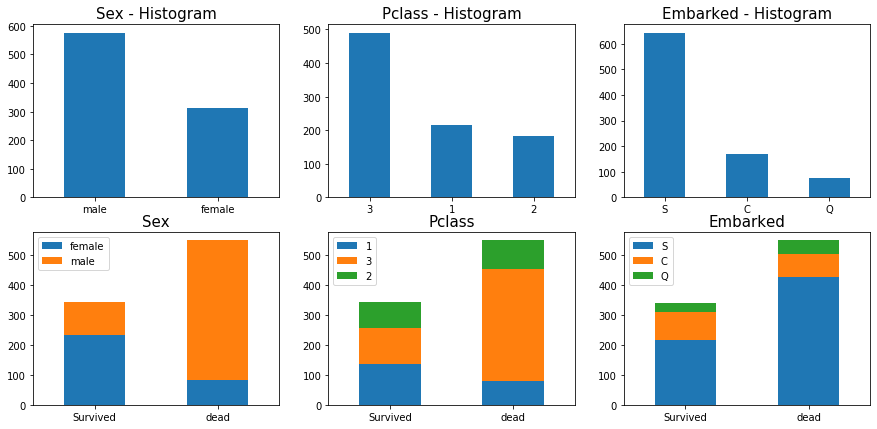

In [6]:
eda_cols =['Sex','Pclass','Embarked']
fig = plt.figure(figsize=(15,7))
for i in range(len(eda_cols)):
    ax1 = plt.subplot(2,len(eda_cols),i+1)
    df[eda_cols[i]].value_counts().plot(kind='bar', ax=ax1)    
    plt.title(eda_cols[i] + " - Histogram", fontsize=15)
    plt.xticks(rotation=0)
    ax2 = plt.subplot(2,len(eda_cols),i+4)
    bar_df(eda_cols[i]).plot(kind='bar', stacked=True, ax=ax2)
    plt.title(eda_cols[i], fontsize=15)
    plt.xticks(rotation=0)
plt.show()

feature별로 단순 생존,사망에 대한 빈도수를 관찰해본 결과,
- 남자(male),
- 낮은 클래스의 승객(3등급)이,
- Southampton에서 승선한 승객이,
상대적으로 사망자가 많다. 

하지만 단순히 위의 히스토그램과 같이 관찰했을때, 애초에 탑승자가 더 많기 때문에 사망자가 더 많은 것일 확률도 배제할 수 없다.  

이번엔 **연령대에 따른 생존여부 도수분포표**이다.  

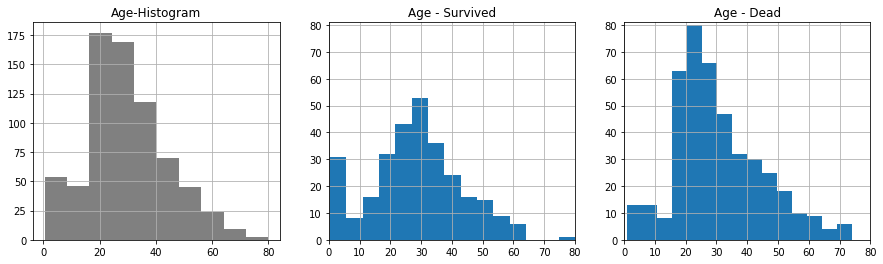

In [7]:
plt.figure(figsize=(15,4))
plt.subplot(131)
df['Age'].hist(bins=10, color='gray')
plt.title("Age-Histogram")
plt.subplot(132)
plt.axis([0,80,0,81])
df[df['Survived']==1]['Age'].hist(bins=15)
plt.title("Age - Survived")
plt.subplot(133)
plt.axis([0,80,0,81])
df[df['Survived']==0]['Age'].hist(bins=15)
plt.title("Age - Dead")
plt.show()

나이대는 큰 특징은 없는 것 같다.  
탑승객들의 나이 분포와 같이 확인해 봤을때, 

- 고령자들은 상대적으로 생존확률이 적었던 것 같고,
- 어린아이 또는 미성년자들은 상대적으로 생존확률이 높았던 것으로 추측할 수 있을까?  

하지만, Age의 경우 177개의 결측값이 있기 때문에 이를 적절하게 처리하는 것이 선행되어야 할 것이다.  

다음은 **연령별, 티켓 요금 분포를 생존여부에 따른 산점도**이다.  

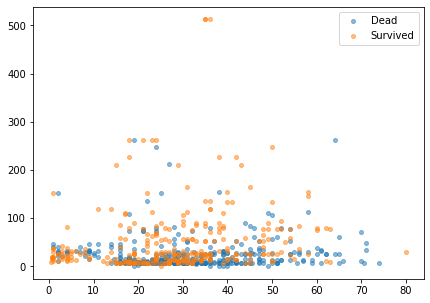

In [8]:
plt.figure(figsize=(7,5))
for i in range(len(["Dead","Survived"])):
    tt = df[df['Survived']==i]
    plt.plot(tt['Age'],tt['Fare'], ".", label=["Dead","Survived"][i], alpha=0.5, markersize=8)
plt.legend()
plt.show()

눈에 띄는 특징은 없는 것 같다.  

다음은 **승선한 항구별, 티켓 등급별 승객 수** 이다.  
승선한 지역이 상류층 지역일 경우에 티켓 등급이 상위등급인 사람이 많지 않을까 라는 생각이 들었다.  

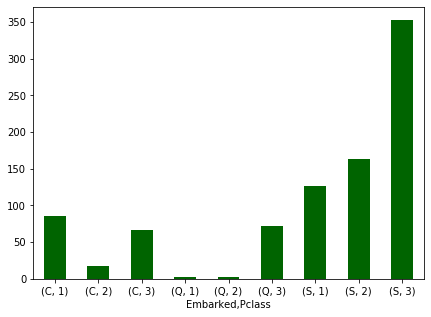

In [36]:
plt.figure(figsize=(7,5))
df.groupby(['Embarked','Pclass'])['PassengerId'].count().plot(kind='bar', color="darkgreen")
plt.xticks(rotation=0)
plt.show()

애초에 Southampton지역에서 탑승한 승객이 가장 많기도 하고, Queenstown에서 탑승한 승객이 대부분 3등급이라는 사실을 제외하고는 판단짓기 어려운 결과인 것 같다.  



우선은 이제 feature engineering 단계로 넘어가서 전처리 및 파생변수 등을 생성하고
그때그때 다시 EDA를 해보기로 한다.  